<a href="https://colab.research.google.com/github/ShubhamMohanty680/Time_Series-Project/blob/main/TimeSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Ingestion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys

In [2]:
data=pd.read_csv('TSLA.CSV')

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
# Univariate Analysis
stock_data=data[['Date','Close']]

In [5]:
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
stock_data['Date']=pd.to_datetime(stock_data['Date'])

<ipython-input-7-fe252bb9c621>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date']=pd.to_datetime(stock_data['Date'])


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
stock_data=stock_data.set_index('Date')

## why we are converting date column as a index column

1. i can easily retrive the data
2. visulization is also simple
3. those lib has been degined in such a way that it required date column as a index(scipy statsmodel)

# EDA on Data

1. Summary Statistics
- Compute summary statistics such as mean, median, mode, standard deviation, to get an overview of the data.

2. Visualize the Time Series Data
- Plot the Time Series data

- Plot the rolling mean and rolling standard deviation of the Time Series data.
- Decompose the Time Series Data check for any trends, seasonality, and Noise.
- Plot the decomposed components to get a better understanding of the Time Series data.

3. Stationarity Check
- Check for stationarity.
- Check for stationarity of the Time Series data using the Augmented Dickey-Fuller test.

4. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.

5. Outlier Detection
- Detect and handle outliers using statistical methods or machine learning techniques.

6. Check for Autocorrelation
- Plot the autocorrelation function (ACF) and partial autocorrelation function (PACF) to identify the order of the ARIMA model.


In [10]:
stock_data.describe()

,Close
count,758.000000
mean,485.531513
std,353.160353
min,35.793999
25%,112.323500
50%,488.125000
75%,762.142502
max,1229.910034


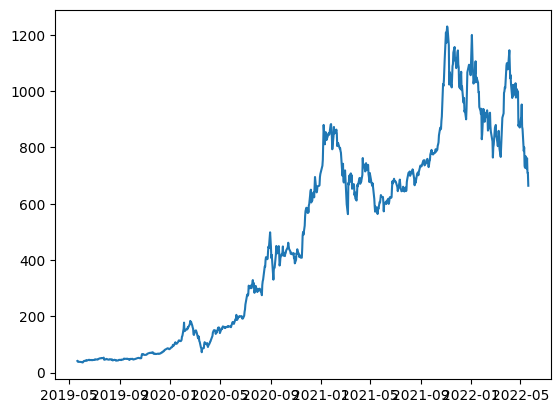

In [11]:
plt.plot(stock_data.Close)

(array([228.,  57.,  38.,  59.,  50., 127.,  81.,  44.,  59.,  15.]),
 array([  35.79399872,  155.20560226,  274.61720581,  394.02880936,
         513.4404129 ,  632.85201645,  752.26362   ,  871.67522354,
         991.08682709, 1110.49843063, 1229.91003418]),
 <BarContainer object of 10 artists>)

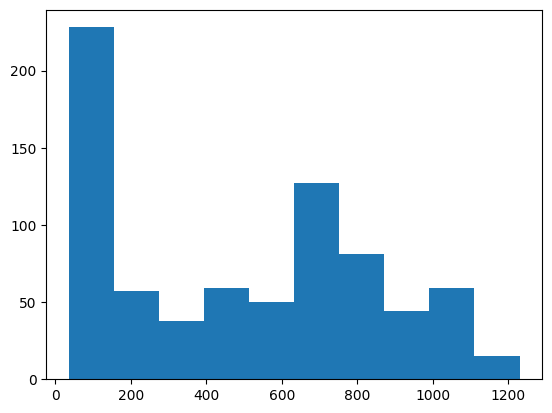

In [12]:
plt.hist(stock_data.Close)

<ipython-input-13-46a4cb4fe73c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(stock_data.Close)


<Axes: xlabel='Close', ylabel='Density'>

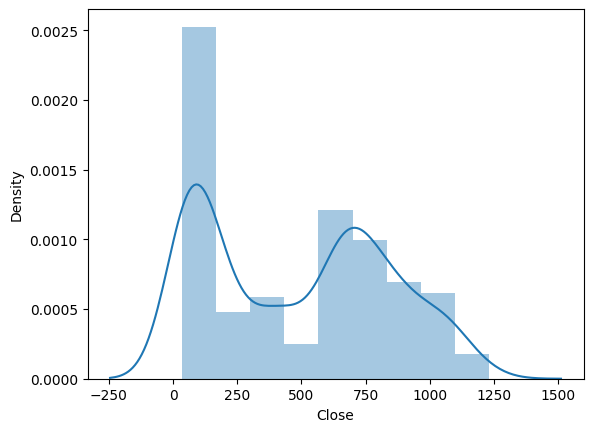

In [13]:
import seaborn as sns
sns.distplot(stock_data.Close)

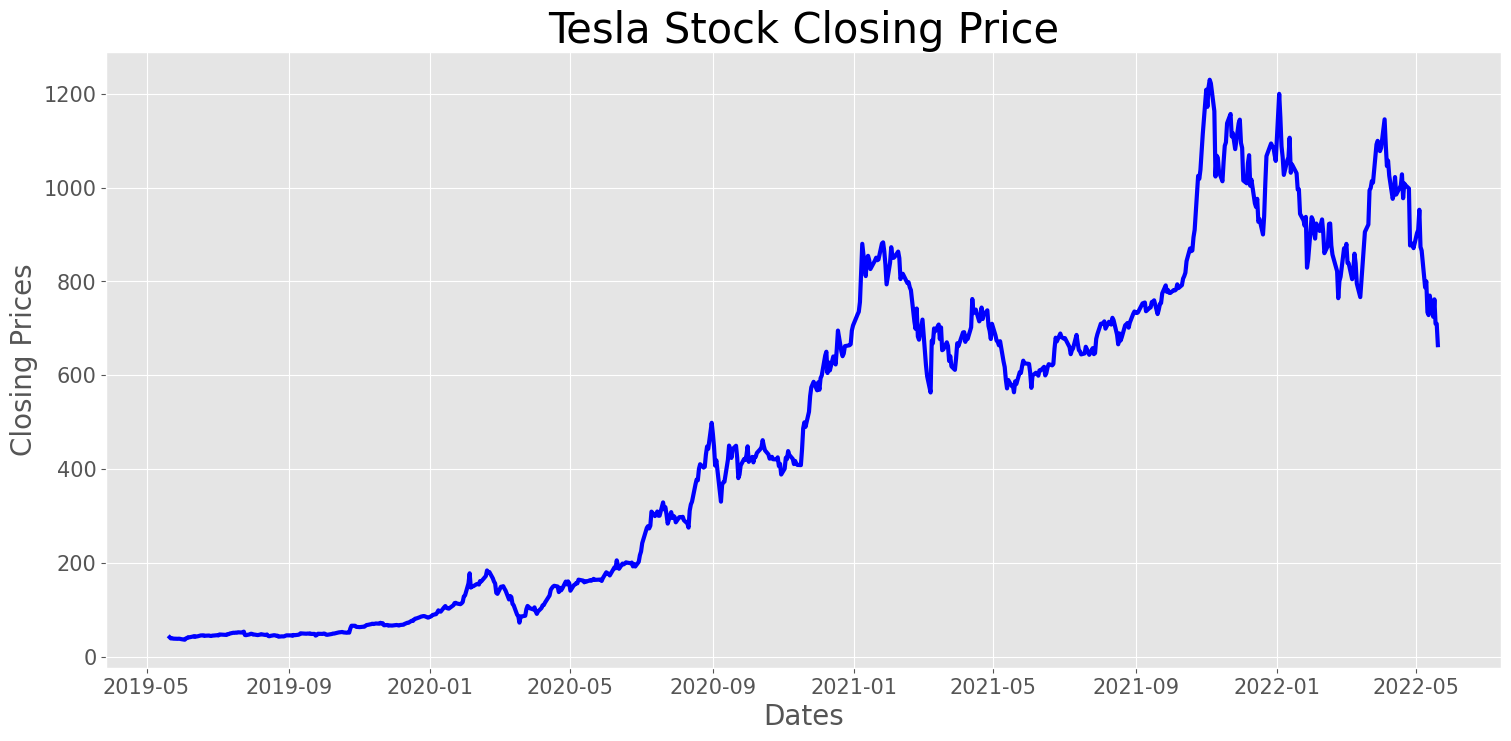

In [14]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Closing Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

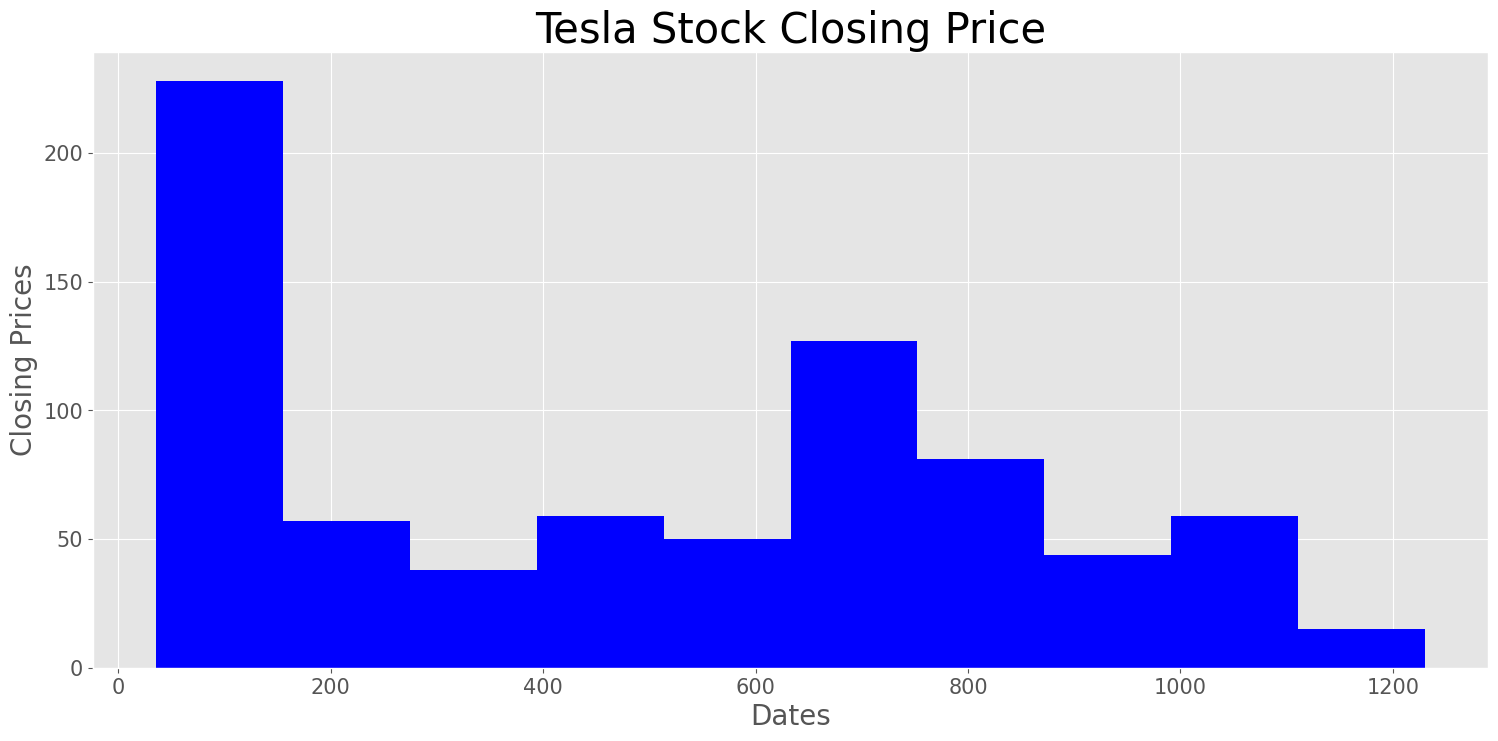

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Closing Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(stock_data['Close'], linewidth=3, color='blue')
plt.title('Tesla Stock Closing Price',fontsize=30)
plt.show()

In [16]:
rollmean=stock_data['Close'].rolling(365).mean()

In [17]:
rollmean

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
...,...
2022-05-16,812.017943
2022-05-17,812.478847
2022-05-18,812.782327


In [18]:
rollstd=stock_data['Close'].rolling(365).std()

In [19]:
rollstd

,Close
Date,
2019-05-21,NaN
2019-05-22,NaN
2019-05-23,NaN
2019-05-24,NaN
2019-05-28,NaN
...,...
2022-05-16,164.116764
2022-05-17,163.736844
2022-05-18,163.442547


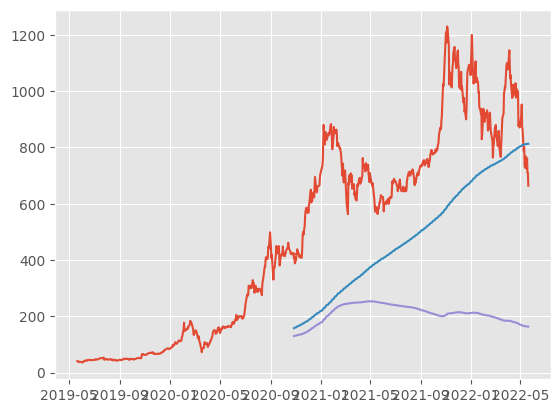

In [20]:
plt.plot(stock_data.Close)
plt.plot(rollmean)
plt.plot(rollstd)

In [21]:
#ADF(ada fullar test)
from statsmodels.tsa.stattools import adfuller
adft=adfuller(stock_data.Close)

In [22]:
adft

(-1.3630085817037492,
 0.5998762543050696,
 9,
 748,
 {'1%': -3.43912257105195,
  '5%': -2.8654117005229844,
  '10%': -2.568831705010152},
 6794.359259220987)

In [23]:
pd.Series(adft[0:4],index=['test stats','p value','lag','data points'])

,0
test stats,-1.363009
p value,0.599876
lag,9.000000
data points,748.000000


In [24]:
#Test for staionarity
def test_stationarity(timeseries):
    # Determing rolling statistics
    rolmean = timeseries.rolling(48).mean() # rolling mean
    rolstd = timeseries.rolling(48).std() # rolling standard deviation
    # Plot rolling statistics:
    plt.figure(figsize = (18,8))
    plt.grid('both')
    plt.plot(timeseries, color='blue',label='Original', linewidth = 3)
    plt.plot(rolmean, color='red', label='Rolling Mean',linewidth = 3)
    plt.plot(rolstd, color='black', label = 'Rolling Std',linewidth = 4)
    plt.legend(loc='best', fontsize = 20, shadow=True,facecolor='lightpink',edgecolor = 'k')
    plt.title('Rolling Mean and Standard Deviation', fontsize = 25)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.show(block=False)

    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    # hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)


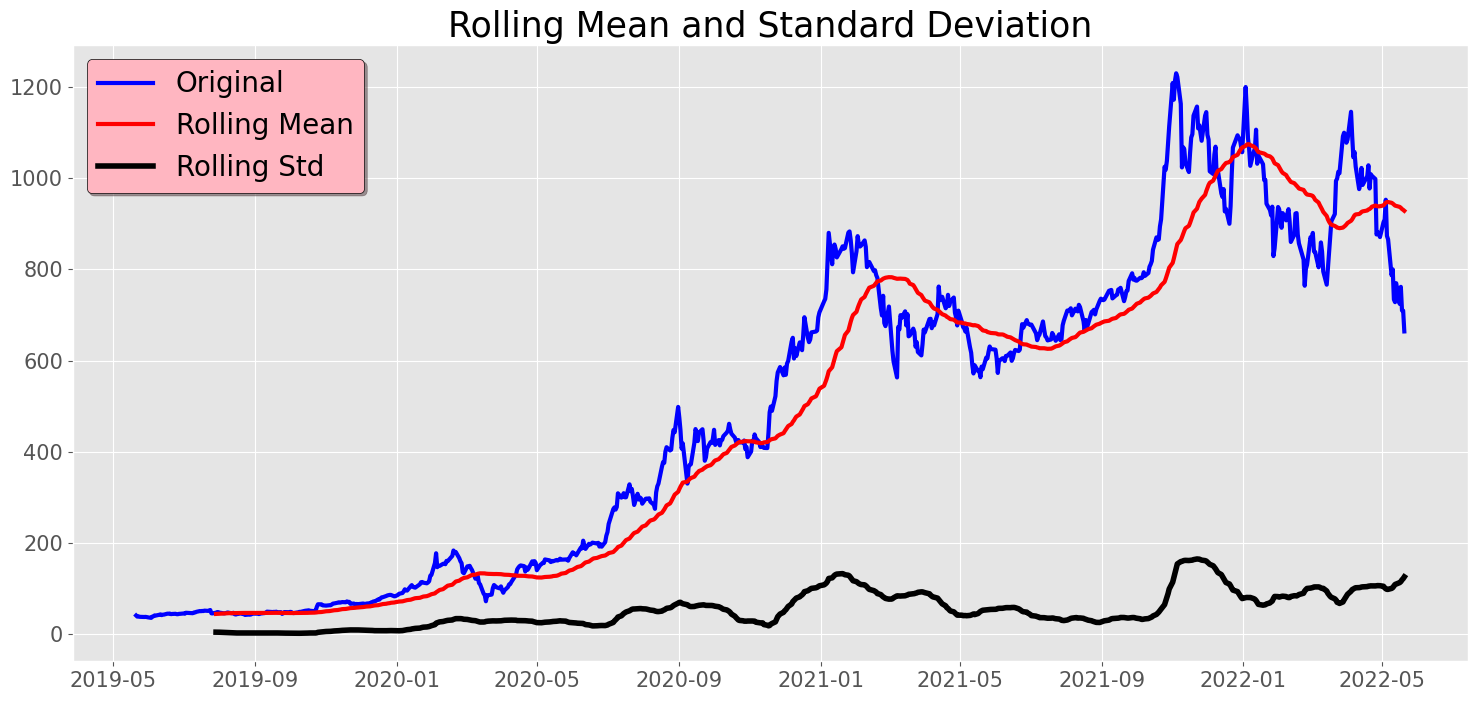

Results of dickey fuller test
Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
critical value (1%)             -3.439123
critical value (5%)             -2.865412
critical value (10%)            -2.568832
dtype: float64


In [25]:
test_stationarity(stock_data.Close)

<Axes: ylabel='Close'>

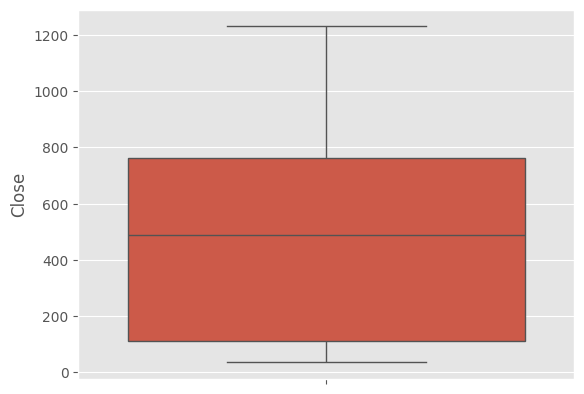

In [26]:
sns.boxplot(stock_data.Close)

In [27]:
#time series decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(stock_data.Close,period=12)

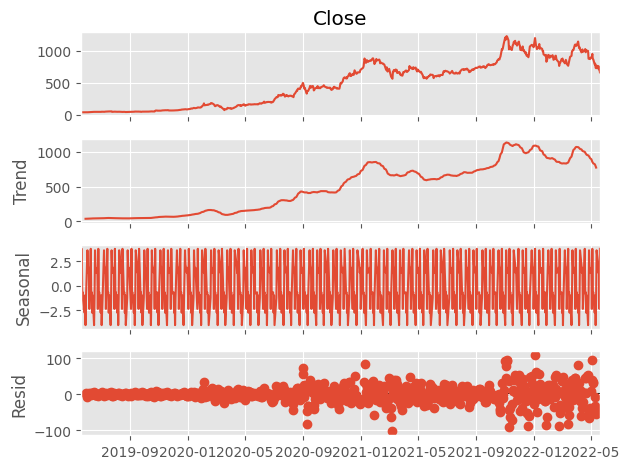

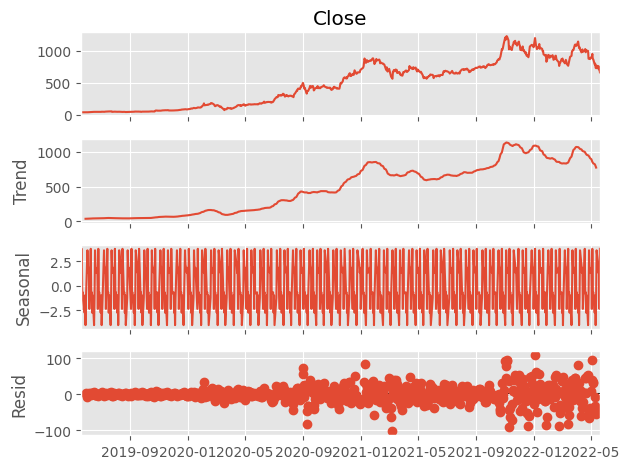

In [28]:
result.plot()

In [29]:
result.seasonal

,seasonal
Date,
2019-05-21,-2.346452
2019-05-22,3.768884
2019-05-23,-0.777006
2019-05-24,-0.654226
2019-05-28,-2.737845
...,...
2022-05-16,2.149519
2022-05-17,1.323680
2022-05-18,1.837638


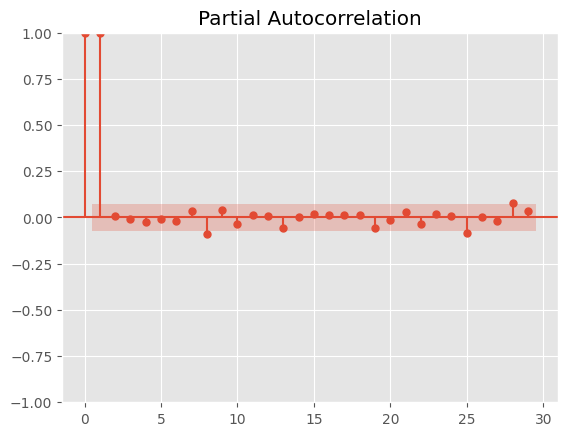

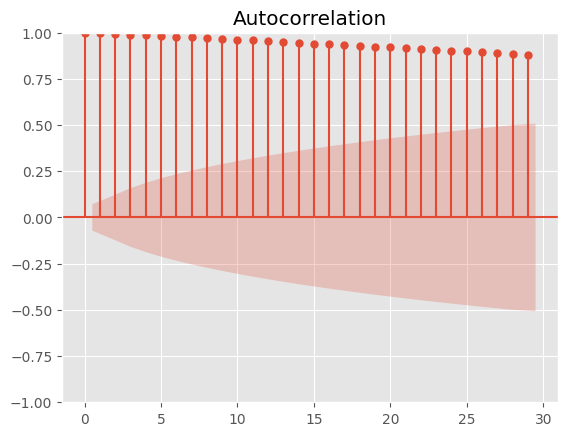

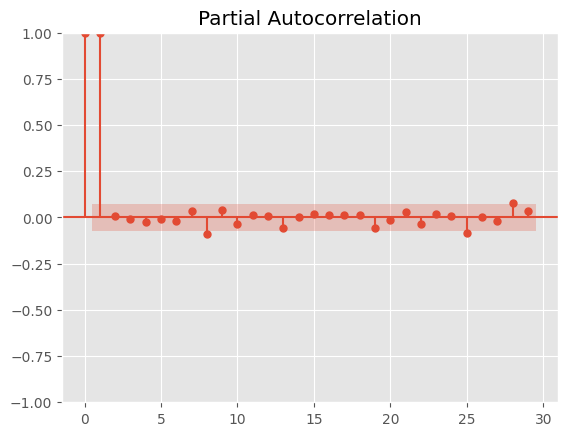

In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(stock_data.Close)
plot_pacf(stock_data.Close)

# Preprocessing of Data

1. filling missing values(not required here)
2. convert data into stationary time series
3. if necessary then normalize the data(here not required)
4. split the data into train and test
5. clean the data by removing outliers(here not required)

In [31]:
df_close=stock_data['Close']

In [32]:
df_close

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002
...,...
2022-05-16,724.369995
2022-05-17,761.609985
2022-05-18,709.809998


In [33]:
df_close=df_close.diff()
df_close=df_close.dropna()

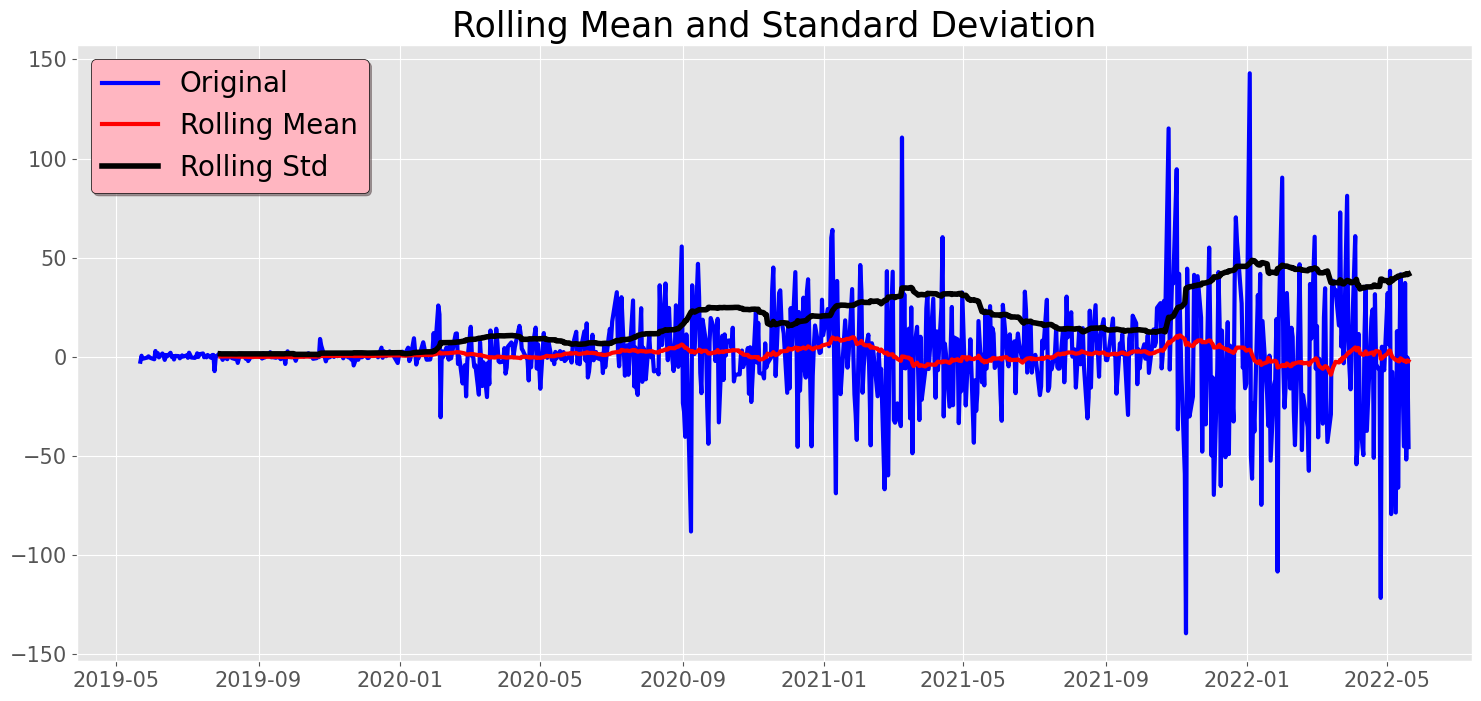

Results of dickey fuller test
Test Statistics               -8.324564e+00
p-value                        3.498786e-13
No. of lags used               8.000000e+00
Number of observations used    7.480000e+02
critical value (1%)           -3.439123e+00
critical value (5%)           -2.865412e+00
critical value (10%)          -2.568832e+00
dtype: float64


In [34]:
test_stationarity(df_close)

In [35]:
df_close[0:60]

,Close
Date,
2019-05-22,-2.469997
2019-05-23,0.551998
2019-05-24,-0.972000
2019-05-28,-0.385998
2019-05-29,0.231998
2019-05-30,-0.327999
2019-05-31,-0.612000
2019-06-03,-1.238003
2019-06-04,2.926003


In [36]:
df_close[-60:]

,Close
Date,
2022-02-25,9.099976
2022-02-28,60.559998
2022-03-01,-6.059998
2022-03-02,15.520020
2022-03-03,-40.600037
2022-03-04,-1.000000
2022-03-07,-33.709961
2022-03-08,19.820007
2022-03-09,34.569946


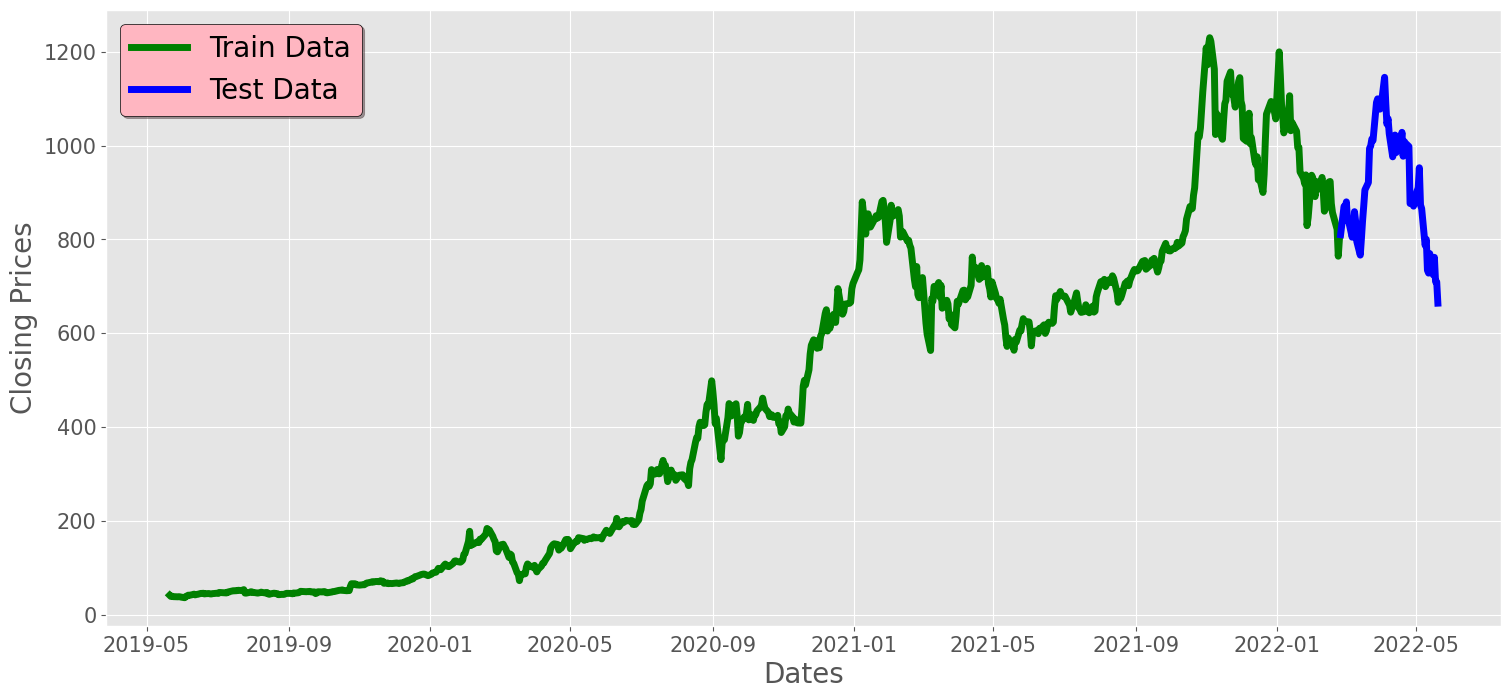

In [56]:
#split data into train and test data
train_data=stock_data["Close"][0:-60]
test_data=stock_data["Close"][-60:]
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Closing Prices',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(train_data,'green',label='Train Data',linewidth=5)
plt.plot(test_data,'blue',label='Test Data',linewidth=5)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')


# Model Building

In [57]:
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [58]:
history=[x for x in train_data]

In [59]:
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [60]:
model=ARIMA(history,order=(1,1,1))

In [61]:
model=model.fit()

In [62]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Tue, 24 Sep 2024   AIC                           6306.700
Time:                        13:23:01   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [63]:
len(history)

698

In [64]:
model.forecast()[0]

800.2043832076607

In [65]:
mean_squared_error([test_data[0]],model.forecast())

93.42405358558581

In [66]:
np.sqrt(mean_squared_error([test_data[0]],model.forecast()))

9.665611909526774

In [67]:
def train_arima_model(X,y,arima_order):
    history=[x for x in X]
    predictions=list()
    for t in range(len(y)):
        model=ARIMA(history,order=arima_order)
        model_fit=model.fit()
        yhat=model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(y[t])
    # calculate out of sample error
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse


In [68]:
#evaluate different combinations of p,d and q values for an ARIMA model to get the best order for ARIMA model
def evaluate_models(dataset,test,p_values,d_values,q_values):
  dataset=dataset.astype('float32')
  best_score,best_cfg=float('inf'),None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order=(p,d,q)
        try:
          rmse=train_arima_model(dataset,test,order)
          if rmse<best_score:
            best_score,best_cfg=rmse,order
          print('ARIMA%s RMSE=%.3f'%(order,rmse))
        except:
          continue

  print('Best ARIMA%s RMSE=%.3f'%(best_cfg,best_score))

In [69]:
import warnings
warnings.filterwarnings('ignore')
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
evaluate_models(train_data,test_data,p_values,d_values,q_values)

ARIMA(0, 0, 0) RMSE=457.414
ARIMA(0, 0, 1) RMSE=241.164
ARIMA(0, 0, 2) RMSE=173.011
ARIMA(0, 1, 0) RMSE=39.516
ARIMA(0, 1, 1) RMSE=39.482
ARIMA(0, 1, 2) RMSE=39.617
ARIMA(0, 2, 0) RMSE=57.835
ARIMA(0, 2, 1) RMSE=39.611
ARIMA(0, 2, 2) RMSE=39.580
ARIMA(1, 0, 0) RMSE=39.477
ARIMA(1, 0, 1) RMSE=39.449
ARIMA(1, 0, 2) RMSE=39.584
ARIMA(1, 1, 0) RMSE=39.475
ARIMA(1, 1, 1) RMSE=39.555
ARIMA(1, 1, 2) RMSE=39.935
ARIMA(1, 2, 0) RMSE=46.184
ARIMA(1, 2, 1) RMSE=39.573
ARIMA(1, 2, 2) RMSE=39.731
ARIMA(2, 0, 0) RMSE=39.440
ARIMA(2, 0, 1) RMSE=39.494
ARIMA(2, 0, 2) RMSE=39.581
ARIMA(2, 1, 0) RMSE=39.635
ARIMA(2, 1, 1) RMSE=39.759
ARIMA(2, 1, 2) RMSE=39.656
ARIMA(2, 2, 0) RMSE=45.781
ARIMA(2, 2, 1) RMSE=39.739
ARIMA(2, 2, 2) RMSE=39.732
Best ARIMA(2, 0, 0) RMSE=39.440


In [70]:
history=[x for x in train_data]
predictions=list()
for j in range(len(test_data)):
  model=ARIMA(history,order=(2,0,0))
  model=model.fit()
  fc=model.forecast(alpha=0.05)
  predictions.append(fc)
  history.append(test_data[j])

print(f"My RMSE is {np.sqrt(mean_squared_error(test_data,predictions))}")


My RMSE is 39.730846532379395


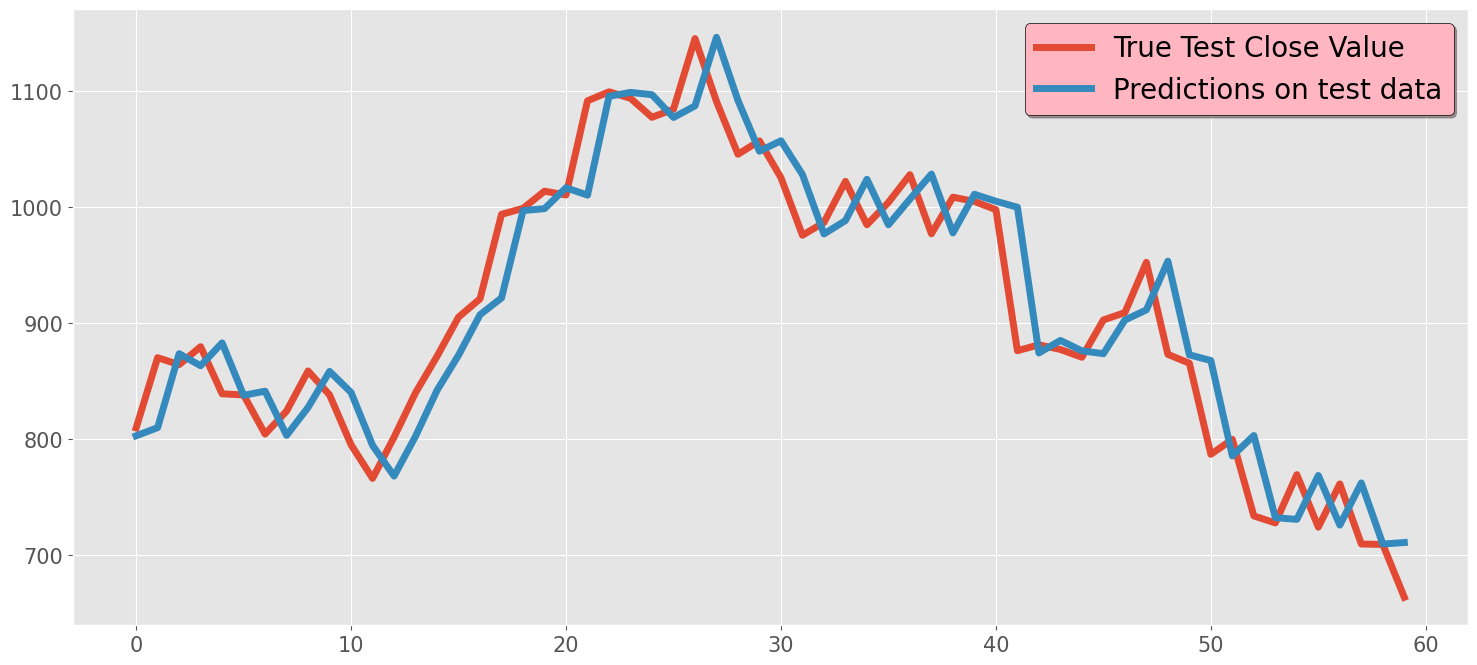

In [71]:
plt.figure(figsize=(18,8))
plt.grid(True)
plt.plot(range(len(test_data)),test_data,label='True Test Close Value',linewidth=5)
plt.plot(range(len(predictions)),predictions,label='Predictions on test data',linewidth=5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=20,shadow=True,facecolor='lightpink',edgecolor='k')
plt.show()

In [72]:
fc_series=pd.Series(predictions,index=test_data.index)

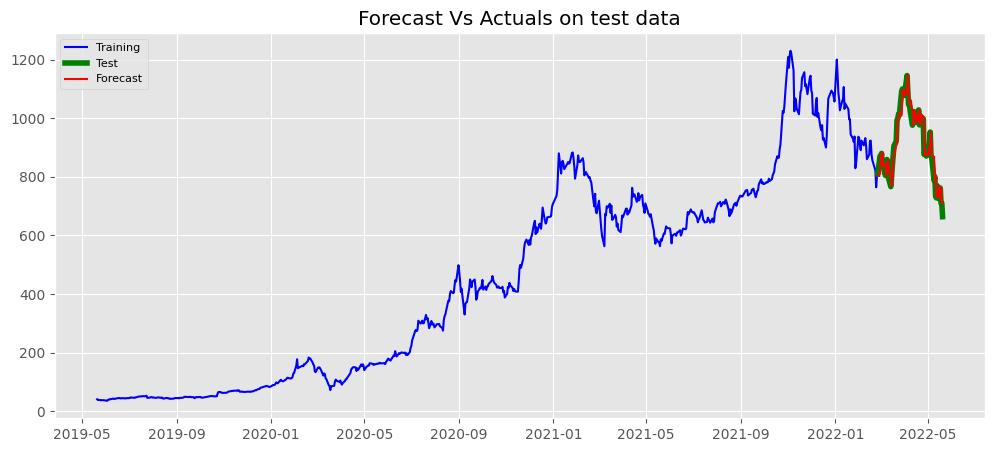

In [77]:
plt.figure(figsize=(12,5),dpi=100)
plt.plot(train_data,label='Training',color='blue')
plt.plot(test_data,label='Test',color='green',linewidth=4)
plt.plot(fc_series,label='Forecast',color='red')
plt.title('Forecast Vs Actuals on test data')
plt.legend(loc='upper left',fontsize=8)
plt.show()

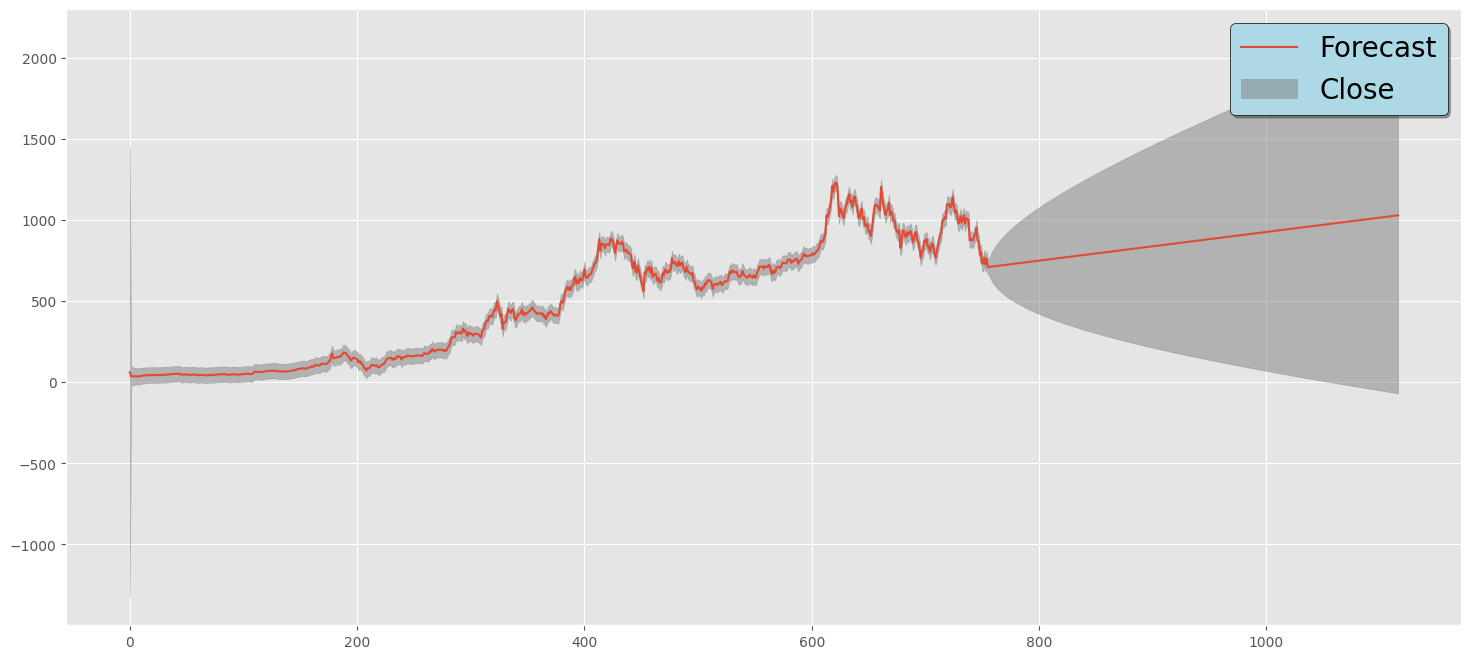

In [83]:
from statsmodels.graphics.tsaplots import plot_predict
fig=plt.figure(figsize=(18,8))
ax1=fig.add_subplot(111)
plot_predict(result=model,start=1,end=len(df_close)+360,ax=ax1)
plt.grid("both")
plt.legend(['Forecast','Close','95% Confidence interval'],fontsize=20,shadow=True,facecolor='lightblue',edgecolor='k')
plt.show()

In [84]:
# Seasonal ARIMA
import warnings
warnings.filterwarnings('ignore')
history = [x for x in train_data]
predictions = list()
conf_list = list()
for t in range(len(test_data)):
    model = sm.tsa.statespace.SARIMAX(history, order = (0,1,0), seasonal_order = (1,1,1,3))
    model_fit = model.fit()
    fc = model_fit.forecast()
    predictions.append(fc)
    history.append(test_data[t])
print('RMSE of SARIMA Model:', np.sqrt(mean_squared_error(test_data, predictions)))

RMSE of SARIMA Model: 39.73948208025767


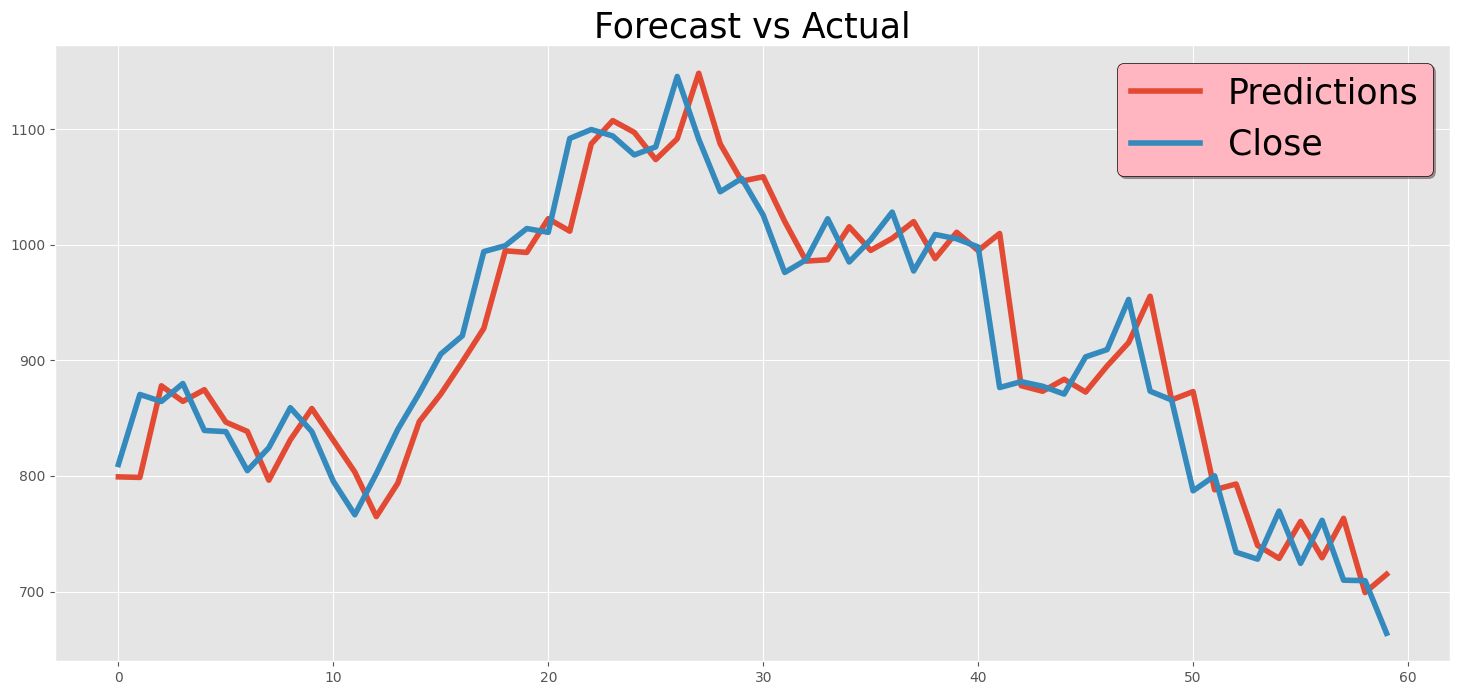

In [85]:
plt.figure(figsize=(18,8))
plt.title('Forecast vs Actual', fontsize = 25)
plt.plot(range(60), predictions, label = 'Predictions', linewidth = 4)
plt.plot(range(60), test_data, label = 'Close', linewidth = 4)
plt.legend(fontsize = 25, shadow=True,facecolor='lightpink',edgecolor = 'k')